In [1]:
from sympy import *
from sympy.solvers.solveset import linsolve
init_printing()
import numpy as np

In [19]:
q1p, q1m, q2p, q2m, q3p, q3m, q4p, q4m, q5p, q5m = symbols("q_1^+, q_1^-, q_2^+, q_2^-, q_3^+, q_3^-, q_4^+, q_4^-, q_5^+, q_5^-")
Q1, Q2, Q3, Q4, Q5 = symbols("Q_1, Q_2, Q_3, Q_4, Q_5")

J_cyt = 2*(q2m*Q3- Q2*q2p)
J_er = -2*(q4p*Q4-Q5*q4m)

J_cyt,J_er


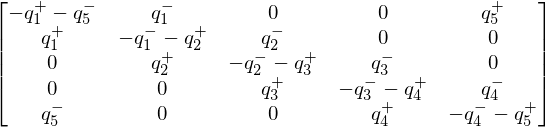

In [3]:
M = Matrix(( (-(q1p + q5m), q1m,0,0,q5p),
           (q1p,-(q2p+q1m),q2m,0,0),
          (0,q2p,-(q3p+q2m),q3m,0),
          (0,0,q3p,-(q4p+q3m),q4m),
          (q5m,0,0,q4p,-(q5p+q4m))))
M

In [4]:
M.shape

In [5]:
system = [-(q1p + q5m)*Q1 - q1m*Q2 + q5p*Q5 ,
         q1p*Q1 -(q2p+q1m)*Q2 + q2m*Q3,
         q2p*Q2 -(q3p+q2m)*Q3 + q3m*Q4,
          q3p*Q3 - (q4p+q3m)*Q4 + q4m*Q5,
        1-Q5-Q1-Q2-Q3-Q4]
system

In [6]:
system2 = [simplify(eq.subs(Q5,1-Q1-Q2-Q3-Q4)) for eq in system]

In [7]:
system2 = [s for s in system2 if s!=0]
system2

In [8]:
sol1 = linsolve(system2,(Q1,Q2,Q3,Q4))
#sol1

In [9]:
k1p = 2.59e4 #Hz/mM
k2p = 2.52e3 # Hz
k3p = 20.5 # Hz
k1m = 2 # Hz/mM
k2m = 6.72e4 # Hz/mM
k3m = 1.49e2 # Hz/mM
KdCai = 0.91 # mM
KdCasr = 2.24 # mM
KdH1 = 1.09e-5 # mM
KdHi = sqrt(3.54e-3) #mM
KdHsr = sqrt(1.05e-8) #mM
KdH = 7.24e-5 #mM
n = 2
delta = 1e-5
epsilon = 1e-5
Pi = 1

In [10]:
Ca_cyt = 1e-4 # mM
Ca_cyt0 = 1e-4
Ca_er = .08 # mM
Ca_er0 = 0.08
H_cyt = 10**-7.2 * 1e3 # mM
H_mit = 10**-7.8 * 1e3 # mM
H_er = 10**-7.2
MgATP_cyt = 4 # mM need to change! this is probably too low
MgADP_cyt = .009 # mM

In [11]:
model_rates = {q1p: k1p*MgATP_cyt,
           q2p: 1/epsilon*KdH1/(H_cyt+KdH1)*(Ca_cyt/Ca_cyt0)**2,
           q3p:k2p*KdHi**2/(KdHi**2 + H_cyt**2),
           q4p:1/delta *(KdCasr/Ca_er0)**2,
           q5p:k3p * H_cyt*KdH/(KdHsr**2 + H_cyt*KdH + H_cyt**2),
           q1m:k1m*KdH1/(H_cyt+KdH1),
           q2m:1/epsilon*H_cyt**2/(H_cyt**2+KdHi**2)*(KdCai/Ca_cyt0)**2,
           q3m:k2m*MgADP_cyt,
           q4m:1/delta*KdHsr**2*(Ca_er/Ca_er0)**2/(KdHsr**2 + H_er*KdH + H_er**2),
           q5m:k3m*Pi}
model_rates

In [12]:
Q_inf = sol1.subs(model_rates)
Q_inf = np.array([j for j in Q_inf.args][0],dtype=np.float64)

Q_inf = {q:v for q,v in zip([Q1,Q2,Q3,Q4],Q_inf)}
Q_inf[Q5] = 1-sum(Q_inf.values())
Q_inf

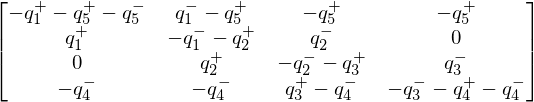

In [13]:
M0 = Matrix(( (-(q1p + q5m)-q5p, q1m-q5p,-q5p,-q5p),
           (q1p,-(q2p+q1m),q2m,0),
          (0,q2p,-(q3p+q2m),q3m),
          (-q4m,-q4m,q3p-q4m,-(q4p+q3m)-q4m)
            ))
M0

In [14]:
eigens = simplify(M0.subs(model_rates).eigenvals())


In [15]:
np.linalg.eig(np.array(M0.subs(model_rates)).astype(np.float64))

(array([-7.85005605e+07, -1.03749301e+05, -9.65186372e+00, -9.33001994e+06]),
 array([[-6.27066898e-08,  7.08164904e-01,  4.45607836e-05,
         -2.26915109e-08],
        [-1.03719940e-06, -7.06046170e-01, -9.99997936e-01,
          7.07011281e-01],
        [ 8.74196636e-06, -1.12906908e-03, -1.58124837e-03,
         -7.07202268e-01],
        [-1.00000000e+00, -1.29812155e-06,  1.27522525e-03,
         -2.54885234e-05]]))

In [16]:
model_rates

In [20]:
J_cyt.subs(Q_inf).subs(model_rates)

In [21]:
J_er.subs(Q_inf).subs(model_rates)